# Welcome 

Oh hey.

# Tutorial Overview

## Topics in Robot Programming

To make robots move and do useful and interesting things, we need to program them. The main programming tasks are:

* Control: Making them moving
* Sensing and Estimation: Figuring out where they are

Closely related issue is:

* Modeling and Simulation: Predicting their behavior using math and computers


## Robot Control

The focus of this tutorial is on control. We will cover the following topics:

* Motion primatives: simple movement used as building blocks
* More complex tasks built from motion primatives
* Feedback control 
* Introductory Python programming

# Jupyter Notebooks and Introduction to Python

This tutorial is run in a *Jupyter notebook*, which software for mixing text and code. We will be programming in Python, which is popular language for web development and scientific computing. 

Below is a "code cell" with the simplest Python program, "Hello World!". You can run code cells
* Click the "Run" button at the top
* Press `Shift`+`Enter`

In [ ]:
print('Hello World!')

## Comments, variables, and other basic operations

Code is read by computers, but it also needs to be read by humans. "Comments" are pieces of text placed in code that don't do anything, but make it easier to read.

*Variables* are used to store data, such as numbers or text. 

In [ ]:
# This is a comment.

# i is an integer variable
i = 5
# j is another integer variable
j = i + 3

# This text variable is called string
s = 'Oh, snap!'

print(i)
print(j)
print(s)

## Functions and Variables

In "Hello World!", `print` is a Python function. Typically a function takes an input, and then does something with that input. Here is another example. Run it to see what happens.

In [ ]:
# This is a simple function
def squared(x):
    # the indented code is all part of the function
    return x**2

# This code is not indented, and is NOT part of the function
print(1,'squared is',squared(1))
print(2,'squared is',squared(2))
print(3,'squared is',squared(3))

## Exercise: `fiendishlyDifficultQuadratic`

In the code cell below, define a function called `fiendishlyDifficultQuadratic` that takes an input $x$, and returns the value $x^2+5x-3$.

As with the `squared` example, print out a few values to make sure that you have done it correctly.

In [ ]:
# Define your function here.

# Print some houtputs here

# The Rolling Sphere

In simulation studies, it is common to study simplified models. Here we will examine a rolling ball. Run the code below. 

* You can control the ball with the arrow keys
* Press ESC to exit the simulation

Before we can work with this model, we need to load some functions. You *must* run this cell in order to do the rest of the tutorial.

In [1]:
# Do not modify this code 
import discoverSTEM as ds
import discoverSTEM.minecraft as mc
import discoverSTEM.vehicles as vh
import discoverSTEM.controllers as ctrl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

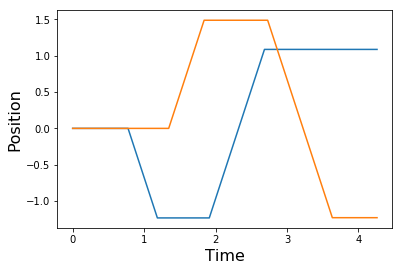

In [2]:
# This code simulates the rolling ball
mc.ballSmall()
# After the simulation, the trajectory of the ball is plotted

## The `ctrl.moveSphereTo` motion primative

Here we describe a controller, `ctrl.moveSphereTo`, which moves the ball to a specific coordinate. First we show the coordinates of the environment.

In [ ]:
# This command shows the coordinates of the environment
mc.smallLayout.plot()

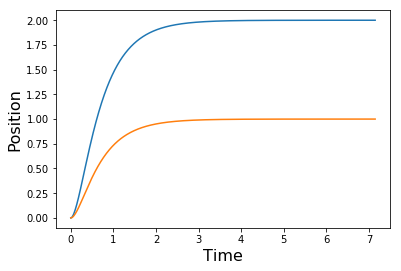

In [4]:
# Here is an example of the moveSphereTo command
mtController = ctrl.moveSphereTo(2,1)
mc.ballSmall(mtController)

## Exercise: Using the `ctrl.moveSphereTo` controller
Play around with the code above to move the sphere to various points in the environment.

## Sequencing Movement Primitives and Lists

Now we will use the `ctrl.moveSphereTo` command as a building block to create more complex motions. The command `ctrl.controllerSequence` takes a *list* of simpler controllers and builds a controller that executes them in a sequence. Run the code below to see how it works.

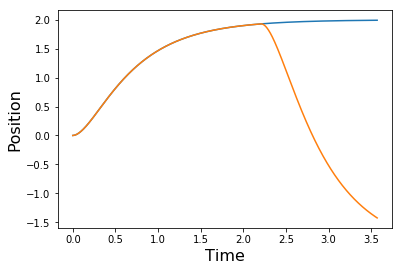

In [3]:
# This is a list
controllerList = [ctrl.moveSphereTo(2,2),
                  ctrl.moveSphereTo(2,-2),
                  ctrl.moveSphereTo(-2,-2),
                  ctrl.moveSphereTo(-2,2),
                  ctrl.moveSphereTo(0,0)]

wpController = ctrl.controllerSequence(controllerList)
mc.ballSmall(wpController)

The points, such as $(2,2)$ and $(2,-2)$ that the sphere must pass through are called *waypoints*.

## Programming background: `for`-Loops

The controller list above holds 5 different `moveSphereTo` commands. However, for longer lists, writing `ctrl.moveSphereTo` every time would be tedious and error prone. Loops enable such repetitive tasks to be automated.

A useful loop is called the *for-loop*. It takes each element to a list and performs a computation on it. Here is an example.

In [ ]:
# This is a list.
margotList = ['Margot','is', 'a', 'dog','and','I','love','her']

# This is a for-loop
for word in margotList:
    # The indented code is executed for every word
    print(word)


This is Margot. 
<img src="figures/margot.JPG" alt="Margot" width="300px"/>

Here is an example of using a for-loop to make a new list

In [ ]:
# here is a list of a bunch of numbers
NumberList = [-5,2,0,2,-1,3]

print('These are the original numbers')
print(NumberList)

# This is a list with no entries
SquareList = []
for n in NumberList:
    # We add new entries to the list 
    SquareList.append(squared(n))
    
    
print('This is list of their squares')
print(SquareList)


Here is a way of making the controller list using a for-loop. Note 

In [ ]:
# First define the waypoints
waypoints = [(2,2),
             (2,-2),
             (-2,-2),
             (-2,2),
             (0,0)]

# Then define the controllers
controllerList = []
for x,y in waypoints:
    movementPrimitive = ctrl.moveSphereTo(x,y)
    controllerList.append(movementPrimitive)

wpController = ctrl.controllerSequence(controllerList)
mc.ballSmall(wpController)

## Exercise: Fiendishly Difficult For-Loops

Use a for-loop and your `fiendishlyDifficultQuadratic` function to compute $x^2+5x-3$ for each entry in `NumberList`. Save it in a new list called `fiendishList`.

In [ ]:
# Make your new list here

# print it out here to make suer you did it correctly


## The Maze Environment

Now we will take what we learned about lists and movement primatives, and use it to navigate through a maze. The code cell below gives the layout and coordinates of the maze.

In [ ]:
layout = mc.mazeLayout
layout.plot()

The goal is to get from $(-7,-7)$ to the center, $(0,0)$.

In [4]:
# If you want to solve the maze manually run this code
mc.ballMaze()

## Exercise: Navigation by waypoints

* Make a list waypoints to solve the maze:
    * Moving from one waypoint to the next should not hit a wall
    * The final waypoint should be at the center, (0,0)
* Use a for-loop to make a list which has a `ctrl.moveSphereTo` controller for each waypoint
* Use the command `ctrl.controllerSequence` to make a controller called `ballMazeController` which solves the maze.

Hint: some example code above does most of the work, but the waypoint sequence does not solve the maze.

In [ ]:
# Make your controller here

# This will test your controller
# It will only work if you named your controller ballMazeController

mc.ballMaze(ballMazeController)

Solving this problem using for-loops has an added advantage: If we want to change the `ctrl.moveSphereTo` command to something else, we only need to change one line.

## Feedback Control: Under the Hood

The rolling sphere is modeled by Newton's equations. So, we need to apply forces to the ball to drive it to desired locations. We compute these forces using a method called *Proportional-Derivative Control* or PD Control. 

If $p$ is the current position, $p_{wp}$ is the desired waypoint position, and $v$ is the velocity, the PD controller gives a force defined by:
\begin{equation}
F = -K_P (p-p_{wp}) - K_D v
\end{equation}
* $K_P$ is the called *proportional gain*, since $K_P (p-p_{wp})$ is proportional to the error in the desired position. The force $-K_P (p-p_{wp})$ acts as a virtual spring between the sphere and the waypoint.
* $K_D$ is the *derivtive gain*, since $K_D v$ is the derivative (from calculus) of the position error. The force $-K_D v$ acts as a virtual damper, slowing the system down. 

(Proportional-Derivative control is a special case of a method known as Proportional-Integral-Derivative (PID) control. It is used in applications like cruise controllers, autopilots, factory equipment, electric generators, and printers. Basically, if something moves on its own, there is good chance it is using a PID controller.)

## Exercise: Experimenting with the Gains

In the code below change the $K_P$ and $K_D$ values and see what happens.

Below are some suggested experiments:

* Hold $K_D$ fixed and vary $K_P$. 
    * For low values of $K_P$, the position should steadily rise to its limit of $1$.
    * For intermediate values of $K_P$, the position will "overshoot", and then settle down to $1$.
    * For large balues of $K_P$, the position will oscillate before settling down to $1$.

* Try to find $K_P$ and $K_D$ so that:
    * The position reaches $1$ at around $1$ second
    * No over-shoot or oscillation occurs

In [ ]:
# Try changing the K_P and K_D values

K_P = 10
K_D = 5
mtController = ctrl.moveSphereTo(1,1,K_P,K_D)
mc.ballSmall(mtController)

# The Differential Drive Car

Now we will move on to a slightly more complex model, called the differential drive car. It is a model for vehicles like excavators and tanks, which can turn their wheels / tracks on either side of the vehicle independently. These vehicles are easier to maneuver than standard cars, since they can turn in place. 

For demo purposes, you can control it manually:
* The arrows turn / move the vehicle
* ESC exits the simulation

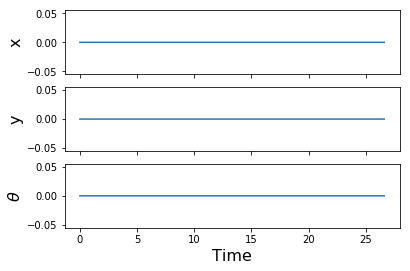

In [5]:
mc.carSmall()


For this vehicle, we will build complex motions from two movement primitives:
* Turning in place
* Driving in a straight line

## Exercise: Turning in place

Similar to the rolling ball, we can use PD control to achieve desired angles. The code below uses PD control to turn from any angle to an angle of $\pi/2$. Tune the gains $K_{P,ang}$  and $K_{D,ang}$ so that:
* No overshoot occurs
* The vehicle angle,  $\theta$, converges to $\pi/2$ in approximately 1 second.

In [ ]:
K_P_ang = .01
K_D_ang = .01
# We represent the angle pi / 2 using the command np.pi/2
turnController = ctrl.turnCar(np.pi/2,K_P_ang,K_D_ang)
mc.carSmall(turnController)

Play around with the code to make the vehicle turn to different angles 

## Exercise: Moving in straight line

Again, we can use PD control to control the amount of forward movement of the system. Tune the gains $K_P$ and $K_D$ so that 
* No overshoot occurs
* The vehicle moves forward by one unit in approximately 1 second

In [ ]:
K_P_for = .01
K_D_for = .01
# We represent the angle pi / 2 using the command np.pi/2
forwardController = ctrl.carForward(1,K_P_for,K_D_for)
mc.carSmall(forwardController)

## Coding Background: If and else

The commands `if` and `else` allow a program to change its behavior depending on the situation. Let's see it in few examples.

In [ ]:
# range(6) generates the integers 0,1,2,3,4,5
for i in range(6):
    # % is the modulo symbol, which is used for taking remainders
    if (i % 2) == 0:
        print(i,'is even')
    else:
        print(i,'is odd')

## Coding Background Enumerate

The `enumerate` command can be used to number the items in list.
This is a trick that will make the final exercise easier.

In [ ]:
for i,word in enumerate(margotList):
    print(i,word)

## Exercise: 

Using `ctrl.turnCar`, `ctrl.carForward`, and `ctrl.controllerSequence` commands, design a controller that drives the car from its initial condition to the center of the maze. Call your controller `carMazeController`

Hint: This can be accomplished by first driving forward, then turning, then driving forward, then turning. . . 
A sequence of controller can then be constructed from a list of distances and angles by combining the "if-else" method with the "enumerate" method.

In [ ]:
# Define carMazeController here

# This will test your controller
# Remember, the controller won't work unless you call it carMazeController
mc.carMaze(carMazeController)

# Recap 

We saw how to build use feedback control to create simple movements called "primatives." Then, we used these primatives to build controllers that could navigate through mazes. We focused on simple mobile robots, but this same basic idea works for other robots such as quadcopters and other tasks, such as object manipulation. 



In [2]:
mc.carMaze()